In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import time
from sklearn.metrics import accuracy_score

In [2]:
#source_folder = "//home//pc19d//Downloads//hw3//"
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw3"

In [3]:
os.listdir(os.path.join(source_folder,"Gisette"))

['Dataset.pdf',
 'GISETTE.htm',
 'gisette.param',
 'gisette_test.data',
 'gisette_train.data',
 'gisette_train.labels',
 'gisette_valid.data',
 'gisette_valid.labels']

# PreProcessing

In [4]:
def Preprocess(dataset,delimiter):

    Train_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.data"),delimiter =delimiter)
    Train_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_train.labels"))
    Test_data  = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.data"),delimiter=delimiter)
    Test_label = np.genfromtxt(os.path.join(source_folder,dataset,dataset.lower()+"_valid.labels"))
    scaler = preprocessing.StandardScaler().fit(Train_data)
    Train_data = scaler.transform(Train_data)
    Test_data  = scaler.transform(Test_data)
    #print(Train_data.mean(axis=0),Train_data.std(axis=0),Test_data.mean(axis=0),Test_data.std(axis=0))
    
    #Add a column of one
    N_train,N_test              = Train_data.shape[0],Test_data.shape[0]
    Train_data,Test_data        = np.hstack((np.ones((N_train,1)),Train_data)),np.hstack((np.ones((N_test,1)),Test_data))
    
    #Change label's from -1 to 0
    Train_label = np.where(Train_label==-1,0,Train_label)
    Test_label  = np.where(Test_label==-1,0,Test_label)
    Train_label,Test_label = Train_label.reshape(-1,1),Test_label.reshape(-1,1)
    return Train_data,Train_label,Test_data,Test_label

# Train

In [5]:
def likelihood_grad(X,Y,W):
    prod = np.exp(np.matmul(X,W))
    temp = np.matmul(X.T,Y - np.divide(prod,1 + prod))
    return temp

In [1]:
def likelihood(X,Y,W,like=False,grad=False):
    temp   = np.matmul(X,W)
    result = Y*temp - np.log(1+np.exp(temp))
    result = np.sum(result,axis=0)
    return result

In [7]:
def update_weight(data,label,lr,LAMBDA,Iter):
    N,p = data.shape
    W = np.zeros(shape = (p,1))
    W_0 = W.copy()
    res = [0]*Iter
    for i in range(Iter):
        W = W_0 - lr*LAMBDA*W_0 + (lr/N)*likelihood_grad(data,label,W_0)
        res[i] = likelihood(data,label,W)
        W_0 = W.copy()
    return W,res

# Predict

In [8]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [9]:
def predict(W, data, threshold=0.5):
    p = sigmoid(data@W) >= threshold
    return(p.astype('int'))

### Part 1

In [78]:
dataset  = str("Gisette")
Train_data,Train_label,Test_data,Test_label = Preprocess(dataset,delimiter="")
Train_data.shape,Train_label.shape,Test_data.shape,Test_label.shape

((6000, 5001), (6000, 1), (1000, 5001), (1000, 1))

In [12]:
LAMBDA = 0.0001  
Iter = 300
lr = 0.01
start = time.time()
W,loglike = update_weight(Train_data,Train_label,lr,LAMBDA,Iter)
print("Total RUN TIME : ",time.time()-start)

Total RUN TIME :  16.607280254364014


Text(0, 0.5, 'Negartive Log-Likelihood')

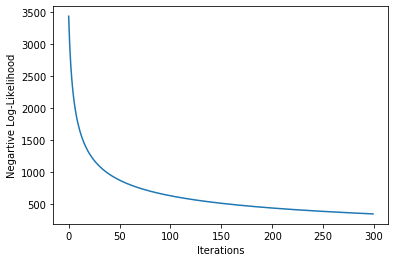

In [91]:
temp = -1*np.array(loglike)
plt.plot(temp)
plt.xlabel("Iterations")
plt.ylabel("Negartive Log-Likelihood")

In [90]:
Predicted_label_train = predict(W,Train_data,threshold=0.5)
Predicted_label_test  = predict(W,Test_data,threshold=0.5)
train_error,test_error = 1-accuracy_score(Train_label,Predicted_label_train),1-accuracy_score(Test_label,Predicted_label_test)
print("Train Error : %f ,Test error : %f"%(train_error,test_error))

Train Error : 0.009333 ,Test error : 0.020000


### Part 2

In [10]:
dataset2  = str("hill_valley")
Train_data2,Train_label2,Test_data2,Test_label2 = Preprocess(dataset2,delimiter="")
Train_data2.shape,Train_label2.shape,Test_data2.shape,Test_label2.shape

((606, 101), (606, 1), (606, 101), (606, 1))

In [11]:
LAMBDA = 0.0001
Iter = 100000
lr = 0.1
start = time.time()
W2,loglike2 = update_weight(Train_data2,Train_label2,lr,LAMBDA,Iter)
print("Total RUN TIME : ",time.time()-start)

Total RUN TIME :  21.976696491241455


Text(0, 0.5, 'Negartive Log-Likelihood')

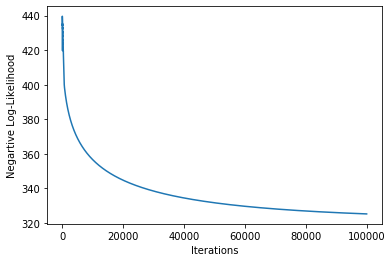

In [12]:
temp = -1*np.array(loglike2)
plt.plot(temp)
plt.xlabel("Iterations")
plt.ylabel("Negartive Log-Likelihood")

In [13]:
Predicted_label_train2 = predict(W2,Train_data2,threshold=0.5)
Predicted_label_test2  = predict(W2,Test_data2,threshold=0.5)
train_error2,test_error2 = 1-accuracy_score(Train_label2,Predicted_label_train2),1-accuracy_score(Test_label2,Predicted_label_test2)
print("Train Error : %f ,Test error : %f"%(train_error2,test_error2))

Train Error : 0.264026 ,Test error : 0.298680


### Part 3

In [80]:
dataset3  = str("Dexter")
Train_data3,Train_label3,Test_data3,Test_label3 = Preprocess(dataset3,delimiter=",")
Train_data3.shape,Train_label3.shape,Test_data3.shape,Test_label3.shape

((300, 20001), (300, 1), (300, 20001), (300, 1))

In [81]:
LAMBDA = 0.0001
Iter = 300
lr = 0.01
start = time.time()
W3,loglike3 = update_weight(Train_data3,Train_label3,lr,LAMBDA,Iter)
print("Total RUN TIME : ",time.time()-start)

Total RUN TIME :  3.862471342086792


Text(0, 0.5, 'Negartive Log-Likelihood')

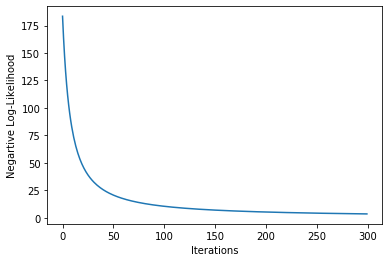

In [93]:
temp = -1*np.array(loglike3)
plt.plot(temp)
plt.xlabel("Iterations")
plt.ylabel("Negative Log-Likelihood")

In [94]:
Predicted_label_train3 = predict(W3,Train_data3,threshold=0.5)
Predicted_label_test3  = predict(W3,Test_data3,threshold=0.5)
train_error3,test_error3 = 1-accuracy_score(Train_label3,Predicted_label_train3),1-accuracy_score(Test_label3,Predicted_label_test3)
print("Train Error : %f ,Test error : %f"%(train_error3,test_error3))

Train Error : 0.000000 ,Test error : 0.140000
